#### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

#### Loading the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

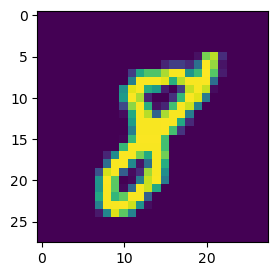

In [3]:
plt.figure(figsize = (5,3))
plt.imshow(x_train[17])

#### Scalling the values

In [4]:
# The pixel values are typically represented as integers ranging from 0 to 255, with 0 representing black and 255 representing white. By dividing the pixel values by 255, we can rescale the values to be in the range of 0 to 1
x_train = x_train/255
x_test = x_test/255

#### Building ANN model with prarmeters

In [5]:
# Define a Sequential model
model = Sequential()

# Add a Flatten layer to flatten the input image to a 1D array
# Input shape is (28, 28) for a 28x28 grayscale image
model.add(Flatten(input_shape=(28,28)))

# Add a Dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add another Dense layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model with parameters built

In [7]:
# Compile the model with sparse categorical crossentropy as the loss function
# This is used when the labels are integers (as opposed to one-hot encoded vectors)
model.compile(loss='sparse_categorical_crossentropy',
              # Use the Adam optimizer to update the weights during training
              optimizer='Adam',
              # Use accuracy as the metric to evaluate the performance of the model
              metrics=['accuracy'])

#### Result

In [8]:
# Train the model using the training data and labels
# x_train is the input data
# y_train is the corresponding labels
# epochs is the number of times the entire dataset is passed through the model during training
# validation_split is the fraction of the training data to use for validation
calculation = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2781 - accuracy: 0.9193 - val_loss: 0.1467 - val_accuracy: 0.9563
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1229 - accuracy: 0.9630 - val_loss: 0.1108 - val_accuracy: 0.9682
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0839 - accuracy: 0.9743 - val_loss: 0.0998 - val_accuracy: 0.9719
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.0965 - val_accuracy: 0.9729
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.0940 - val_accuracy: 0.9733
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0384 - accuracy: 0.9870 - val_loss: 0.0950 - val_accuracy: 0.9747
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0334 - accuracy: 0.9888 - val_loss: 0.1048 - val_accuracy

In [9]:
# Get the weights of the second layer (index 1) in the model using the get_weights() method
weights = model.layers[1].get_weights()

#### Predicting x test values

In [10]:
# Predict the class probabilities of the test data using the model's predict() method
# x_test is the input data for which we want to predict the probabilities
probabilities = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [11]:
# Find the predicted classes by taking the index of the maximum probability in each row of the predicted probabilities array
# The argmax() method returns the indices of the maximum values along an axis
y_pred = probabilities.argmax(axis=1)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9757

#### Visualising changes in loss values and accuracy

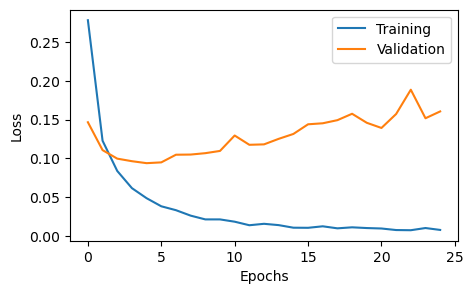

In [13]:
# Create a figure with a specific size
plt.figure(figsize=(5, 3))
# Plot the training loss values stored in the 'loss' key of the 'calculation' object
plt.plot(calculation.history['loss'])
# Plot the validation loss values stored in the 'val_loss' key of the 'calculation' object
plt.plot(calculation.history['val_loss'])
# Add a label to the x-axis
plt.xlabel('Epochs')
# Add a label to the y-axis
plt.ylabel('Loss')
# Add a legend with labels for each line
plt.legend(['Training', 'Validation'])

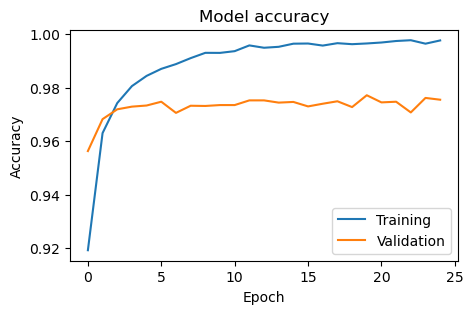

In [14]:
# Set the figure size for the plot
plt.figure(figsize = (5, 3))
# Plot the training accuracy over the epochs
plt.plot(calculation.history['accuracy'])
# Plot the validation accuracy over the epochs
plt.plot(calculation.history['val_accuracy'])
# Set the title of the plot
plt.title('Model accuracy')
# Set the label for x-axis of the plot
plt.xlabel('Epoch')
# Set the label for y-axis of the plot
plt.ylabel('Accuracy')
# Add a legend to the plot
plt.legend(['Training', 'Validation'])

#### Testing the model for the results

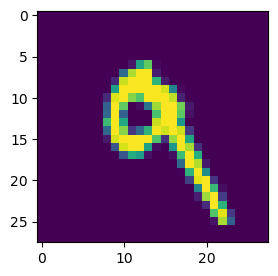

In [15]:
plt.figure(figsize = (5,3))
plt.imshow(x_test[7])

In [16]:
# Predict the class of the handwritten digit image at index 7 in the test set using the trained model
# Reshape the image to have a shape of (1,28,28) to match the input shape of the model
# The predict method returns an array of probabilities for each class
# We use argmax along the axis 1 to get the class with the highest probability
y_pred = model.predict(x_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 24ms/step
